<h4>Medical Cost Personal</h4>
<h6>Can you accurately predict insurance costs(charges)?</h6>

<h4>Raw Data</h4>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

dataset = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
dataset

2022-04-22 16:55:19.858963: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-22 16:55:19.858984: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<h4>EDA (Exploratory Data Analysis)</h4>

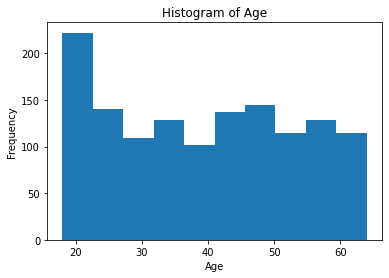

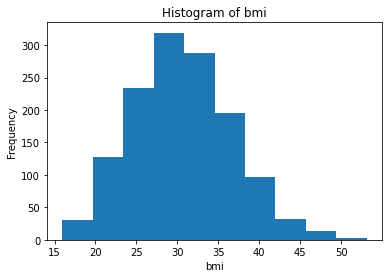

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [2]:
plt.plot(figsize=(10, 9))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.hist(dataset['age'])
plt.title('Histogram of Age')
plt.show()

plt.plot(figsize=(10, 9))
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.hist(dataset['bmi'])
plt.title('Histogram of bmi')
plt.show()

dataset['children'].value_counts()

<h4>Preprocessing data(normalization and standardization)</h4>
<h4>One-Hot Encoding and Shuffle dataset</h4>

In [3]:
dataset = shuffle(pd.get_dummies(dataset), random_state=0) # Return a random sample of items from an axis of object.
dataset

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
578,52,30.200,1,9724.53000,0,1,1,0,0,0,0,1
610,47,29.370,1,8547.69130,1,0,1,0,0,0,1,0
569,48,40.565,2,45702.02235,0,1,0,1,0,1,0,0
1034,61,38.380,0,12950.07120,0,1,1,0,0,1,0,0
198,51,18.050,0,9644.25250,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,27,26.030,0,3070.80870,0,1,1,0,1,0,0,0
835,42,35.970,2,7160.33030,0,1,1,0,0,0,1,0
1216,40,25.080,0,5415.66120,0,1,1,0,0,0,1,0
559,19,35.530,0,1646.42970,0,1,1,0,0,1,0,0


<h4>Create X and Y value (features and labels)</h4>

In [4]:
x = tf.constant(dataset.loc[:, ~dataset.columns.isin(['charges'])], dtype=tf.float16)
y = tf.constant(dataset.loc[:, dataset.columns.isin(['charges'])], dtype=tf.float16)
x

2022-04-22 16:55:22.582060: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-22 16:55:22.582103: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-22 16:55:22.582135: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (felipe-Inspiron-3501): /proc/driver/nvidia/version does not exist
2022-04-22 16:55:22.582578: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(1338, 11), dtype=float16, numpy=
array([[52.  , 30.2 ,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [47.  , 29.38,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [48.  , 40.56,  2.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [40.  , 25.08,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [19.  , 35.53,  0.  , ...,  1.  ,  0.  ,  0.  ],
       [33.  , 18.5 ,  1.  , ...,  0.  ,  0.  ,  1.  ]], dtype=float16)>

<h4>Create train and test dataset</h4>

In [5]:
percent_index = int(0.80 * len(x))
x_train, x_test = tf.constant(x[:percent_index], dtype=tf.float16), tf.constant(x[percent_index:], dtype=tf.float16)
y_train, y_test = tf.constant(y[:percent_index], dtype=tf.float16), tf.constant(y[percent_index:], dtype=tf.float16)


<h4>Build neural network</h4>
<li>Create a model</li>
<li>Compile the model</li>
<li>Fit the model</li>
<li>Evaluate the model</li>

In [6]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.mae])

history = model.fit(x_train, y_train, epochs=100, callbacks=[callback])

model.evaluate(x_test, y_test)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 12875.7705 - mean_absolute_error: 12875.7705
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 11760.1650 - mean_absolute_error: 11760.1650
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 8542.2803 - mean_absolute_error: 8542.2803
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7297.2881 - mean_absolute_error: 7297.2881
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7199.8262 - mean_absolute_error: 7199.8262
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7137.2134 - mean_absolute_error: 7137.2134
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7063.3716 - mean_absolute_error: 7063.3716
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 6988.5200 - mean_absolute_error: 6988.5200
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - l

[4105.923828125, 4105.923828125]

<h4>Plot Loss curve</h4>

Text(0.5, 0, 'epochs')

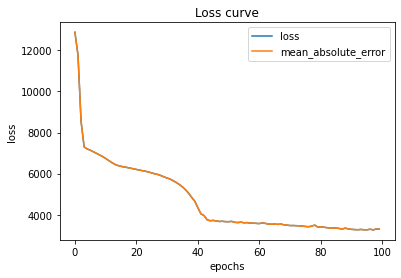

In [7]:
pd.DataFrame(history.history).plot()
plt.title('Loss curve')
plt.ylabel('loss')
plt.xlabel('epochs')

In [8]:
dataset = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

# Create a columns transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region']),
)

# Create a X and Y
x = dataset.loc[:, ~dataset.columns.isin(['charges'])]
y = dataset.loc[:, dataset.columns.isin(['charges'])]

# Build our train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Fit the column transformer to our training data
ct.fit(x_train)

# Transform training and test data with MinMaxScaler and OneHotEncoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)
x_train.loc[0]
x_train_normal[0]

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.mae])

# Fit the model
model.fit(x_train_normal, y_train, epochs=100)

# Evaluate the model
model.evaluate(x_test_normal, y_test)

Epoch 1/100
30/30 [==============================] - 0s 1ms/step - loss: 13377.6719 - mean_absolute_error: 13377.6719
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 13371.9707 - mean_absolute_error: 13371.9707
Epoch 3/100
30/30 [==============================] - 0s 999us/step - loss: 13358.5537 - mean_absolute_error: 13358.5537
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 13330.6709 - mean_absolute_error: 13330.6709
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 13280.8447 - mean_absolute_error: 13280.8447
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 13201.5576 - mean_absolute_error: 13201.5576
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 13085.1543 - mean_absolute_error: 13085.1543
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 12924.4531 - mean_absolute_error: 12924.4531
Epoch 9/100
30/30 [==============================] - 0

[3499.1865234375, 3499.1865234375]